## Update 1/5/2022
Under this are development scripts of different data to be extrapolated.

In [1]:
# import the csv but skip that for now
# this one you wanna just use this url
# https://www.nasdaq.com/press-release/kalvista-pharmaceuticals-reports-positive-results-for-kvd900-phase-2-demonstrating
# get the time of release, check if it's out of market times
# if it is then get the most recent closing, next open
# work on more long term shit later
import pandas as pd
import numpy as np

# retreive health.csv, which contains all symbols, names, and recent statistics of all NASDAQ healthcare stocks
# retreived from https://www.nasdaq.com/market-activity/stocks/screener
df = pd.read_csv('newsreleases_071421.csv')

## Get Publish Time

Each press release has a publish time listed on nasdaq, check it and add it to info. Used later when determining stock market areas to look at.

In [6]:
from selenium import webdriver #import
try:
    fireFoxOptions = webdriver.FirefoxOptions()
    fireFoxOptions.headless=True
    brower = webdriver.Firefox(options=fireFoxOptions)

    brower.get('https://pythonbasics.org')
    print(brower.page_source)
finally:
    try:
        brower.close()
    except:
        pass

<html lang="en"><head><meta name="generator" content="Hexo 3.9.0">
        <meta charset="utf-8">
            
            <title>
                Learn Python Programming - Python Tutorial
            </title>
	    <link rel="canonical" href="https://pythonbasics.org/">
            <meta content="width=device-width, initial-scale=1" name="viewport">
            <meta name="theme-color" content="#4184f3">
            
            
            <link href="/favicon.gif" rel="icon">
            

            
        


<style>h1,h2{padding-bottom:.3em}nav{justify-content:space-between}nav,nav a{color:#fff}*,.menu-wrapper li{box-sizing:border-box}.menu-wrapper a,a{text-decoration:none}.main{min-height:320px}body{color:#404040;font:300 16px/1.5 'Helvetica Neue',Helvetica,Arial,sans-serif;text-shadow:0 0 1px rgba(50,50,50,.2);margin:0;padding:0;-webkit-font-smoothing:antialiased;font-smoothing:antialiased;text-rendering:optimizeLegibility;overflow-x:hidden}h1,h2,h3{position:relative;margin-

In [2]:
from selenium import webdriver #import
import numpy as np
def getfulltime(link):
    # gets full time out of link
    browser=webdriver.Edge("C:/Users/cukel/Downloads/edgedriver_win32_91/msedgedriver.exe")
    browser.get(link)
    fulltime=browser.find_elements_by_xpath("//time[@class='timestamp__date']")[0].text
    browser.close()
    return fulltime

In [3]:
tickers,links = df['0'],df['3']

In [4]:
tickers[2], links[2]

('ABCL',
 'https://www.nasdaq.com/press-release/abcellera-appoints-neil-berkley-as-chief-business-officer-2021-07-13')

In [27]:
getfulltime(links[2])

'JUL 13, 2021 9:00AM EDT'

In [ ]:
# also gonna use a timer
import time
stopwatch=time.time()
times=[]
for ii in range(len(links)):
    try:
        times.append(getfulltime(links[ii]))
        if ii%10==0:
            print(ii, 'time: ',time.time() - stopwatch)
            stopwatch=time.time()
    except: continue

In [ ]:
times

In [19]:
df0 = pd.DataFrame(list(zip(tickers, links,times)),
               columns =['tick', 'link','time'])

In [21]:
df0.to_csv('newsreleases_DATE_FULLTIME.csv',index=False)

## Get Stock Prices

#### Imports

In [4]:
# start here
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('newsreleases_071421_FULLTIME.csv')

times=df['time']
times[0]

'JUL 8, 2021 4:06PM EDT'

#### Determine if outside of normal market range

In [5]:
from dateutil import parser
def getdatetime(dtime):
    return parser.parse(dtime,tzinfos={"EST":-5*3600, "EDT":-4*3600})

In [6]:
from datetime import datetime, time, timedelta
def ismarkethours(timeobj):
    # takes time object
    # starts at 9:30-4:00 weekdays
    openbell = time(9,30)
    closebell= time(16,0)
    # ignoring holidays for now, will become exception-based if statement later
    if timeobj.weekday()<5: # if not on a weekend
        return openbell<timeobj.time() and closebell>timeobj.time()

In [14]:
ismarkethours(getdatetime(times[0]))

False

# Yahoo Finance for Historical Data

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt

data=yf.download('SPY','2015-01-01','2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [8]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,180.976227,121465900
2015-01-05,204.169998,204.369995,201.350006,201.720001,177.707870,169632600
2015-01-06,202.089996,202.720001,198.860001,199.820007,176.034058,209151400
2015-01-07,201.419998,202.720001,200.880005,202.309998,178.227646,125346700
2015-01-08,204.009995,206.160004,203.990005,205.899994,181.390320,147217800
...,...,...,...,...,...,...
2019-12-24,321.470001,321.519989,320.899994,321.230011,312.286224,20270000
2019-12-26,321.649994,322.950012,321.640015,322.940002,313.948608,30911200
2019-12-27,323.739990,323.799988,322.279999,322.859985,313.870789,42528800


Pull a specific stock, look at the prices around the time (subjective) of press release. If outside of market hours, make sure to note it since we can only look at open/close/limited data.

In [9]:
# Take stock ticker
ii = 3
tick=df.iloc[ii].tick
datetime=getdatetime(df.iloc[ii].time)

tick_yf = yf.Ticker(tick)
hist=tick_yf.history(period='max')

In [10]:
datetime.year
datetime.month
datetime.day
print("{}-{}-{}".format(datetime.year, datetime.month, datetime.day))
type(datetime)

2021-7-13


datetime.datetime

In [11]:
data = yf.download(tick, start= ,interval='60m', group_by='ticker',prepost=False)

SyntaxError: invalid syntax (<ipython-input-11-b259df595255>, line 1)

In [12]:
def getpricedata(ticker, time, daybuffer=1, hourbuffer=0, interval='60m'):
    # returns price data around certain time, 
    # which should be based on press release
    # buffer variables expand or constrict range of dates retrieved
    datetime=getdatetime(time) # assume they are NOT coming in as datetime obj
    delta = timedelta(days=+daybuffer, hours=+hourbuffer)
    dt_up = datetime+delta
    dt_dn = datetime-delta
    dt_start = "{}-{}-{}".format(dt_dn.year, dt_dn.month, dt_dn.day)
    dt_end = "{}-{}-{}".format(dt_up.year, dt_up.month, dt_up.day)
    data=yf.download(ticker, start=dt_start, end=dt_end, interval=interval)
    return data

[*********************100%***********************]  1 of 1 completed


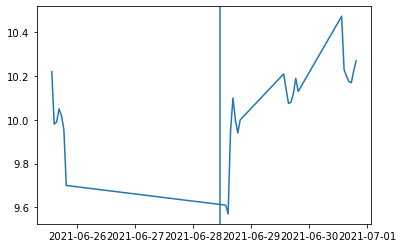

In [16]:
ii = 11      # good ones: 11, 12, 15
tick=df.iloc[ii].tick
time=df.iloc[ii].time
link=df.iloc[ii].link
data=getpricedata(tick, time, daybuffer=3)

plt.plot(data['Adj Close'])
plt.axvline(getdatetime(time))


### Looking at the Article Itself

In [32]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

ii = 12      # good ones: 11, 12, 15
tick=df.iloc[ii].tick
time=df.iloc[ii].time
link=df.iloc[ii].link
link

'https://www.nasdaq.com/press-release/acadia-healthcare-announces-date-for-second-quarter-2021-earnings-release-2021-07-12'

# Next Steps

It seems like we have most of the pieces here, just need to put them together. Looking at some preliminary stuff seems promising so far. A big challenge is knowing how far to expand for a "long term" oversight versus a short term, as there's definitely evidence of two effects. I can't really find anything online about it. Maybe looking at the velocity of the change? Or maybe we just feed everything into the machine and see what happens. We can input different full length periods as different inputs to allow it to be interpreted differently.

It's time to look at machine learning and return to this

#### Testing

In [143]:
# this parser does it all
from dateutil import parser
TEST=times[4]
print(TEST)
TESTout = parser.parse(TEST.replace('EDT','EST'),tzinfos={"EST":-5*3600, "EDT":-4*3600})
print(TESTout.weekday())

JUL 7, 2021 7:30AM EDT
2


In [131]:
# see how it handles EST
TEST = times[1]#.replace('EDT','EST')
parser.parse(TEST, tzinfos={"EST":-5*3600, "EDT":-4*3600}) # time zones should only be in EDT or EST
# if more time zones are present this will need to become a larger dict
# available here  https://gist.github.com/h-j-13/e3a585796510b59601e34a07e99b386d

datetime.datetime(2021, 6, 24, 16, 15, tzinfo=tzoffset('EDT', -14400))

In [147]:
getdatetime(times[4])

datetime.datetime(2021, 7, 7, 7, 30, tzinfo=tzoffset('EDT', -14400))